In [2]:
#IMPORTING SHIT
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt


import scipy
import scipy.signal
from scipy import signal
from scipy.io.wavfile import write
from scipy.io.wavfile import read
from scipy.signal import lfilter

from os.path import dirname, join as pjoin


import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

import wave

import colorednoise as cn
#from matplotlib import pylab as plt

import sounddevice as sd

from tqdm import tqdm
import time

import pathlib
from util.util import load_data_json, to_db
from expr.analysis import load_analysis

import hr.pam as pam
import hr.process as pierre

from scipy.optimize import curve_fit

%matplotlib widget

> ## Signal Synthesis

> Simple Noisless Signal with Two Sinusoids

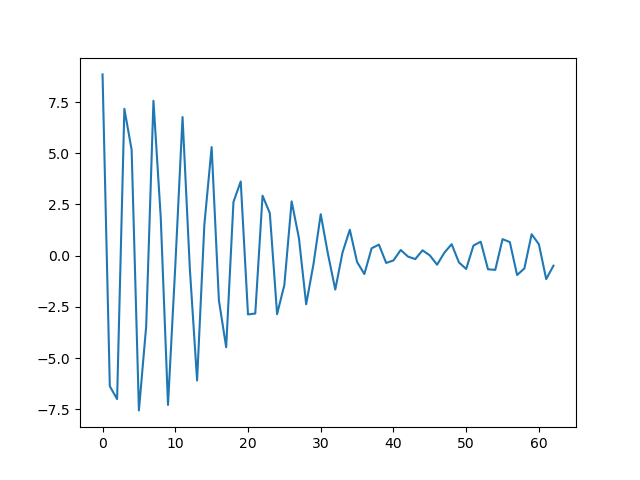

In [2]:
N_synth = 63

f0_synth = 1/4
f_synth = np.array([f0_synth, f0_synth+(1/N_synth)])

a_synth = np.array([1, 10])

delta_synth = np.array([0, -0.05])

phi_synth = np.array([1.5, 0.5])

# synthesised signal
x_synth = pam.synthesize(N_synth, delta_synth, f_synth, a_synth, phi_synth)

plt.plot(np.real(x_synth[0]))

#np.max(np.real(x_synth))

> Simple Noisless Signal with One Sinusoid and Vibrato Effect

In [3]:
N_vibr0 = 2**9-1

delta_vibr0 = np.array([0])

f_vibr0 = np.array([0.3])

a_vibr0 = np.array([2])

phi_vibr0 = np.array([0])

vibrato0 = pam.synthesize(N_vibr0, delta_vibr0, f_vibr0, a_vibr0, phi_vibr0, 0.02, 5, 0, 0)

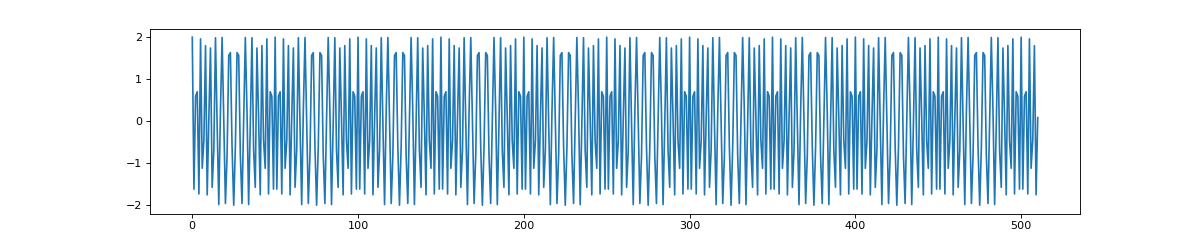

In [4]:
plt.figure(figsize=(15, 3), dpi=80)

plt.plot(np.real(vibrato0[0]))
plt.show()


In [5]:
fs_vibr0 = 1000

sd.play(np.real(vibrato0[0]), fs_vibr0)

print("The length of the signal is", N_vibr0/fs_vibr0, "seconds.")

t = np.linspace(0., N_vibr0/fs_vibr0, fs_vibr0)
amplitude = np.iinfo(np.int16).max
data  = amplitude*np.real(vibrato0[0])

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("vibrato.wav", fs_vibr0, data.astype(np.int16))

The length of the signal is 0.511 seconds.


> Noisless Signal with Eight Sinusoids and vibrato Effect

In [6]:
N_vibr1 = 2**11-1

K_vibr1 = 8

f0_vibr1 = 0.06
f_vibr1 = f0_vibr1*np.arange(1,K_vibr1+1)

a_vibr1 = np.array([0.00807193, 0.09748246, 0.02404544, 0.04275309, 0.02482811,
       0.08778044, 0.00470351, 0.03118916])

delta_vibr1 = -0.0001*np.random.rand(K_vibr1)

phi_vibr1 = np.array([1.76348603, 1.20411769, 0.76158339, 1.35157899, 0.36247392,
       1.44086579, 1.73647764, 1.98131046])

vibrato1 = pam.synthesize(N_vibr1, delta_vibr1, f_vibr1, a_vibr1, phi_vibr1, 0.003, 10, 0, 0)

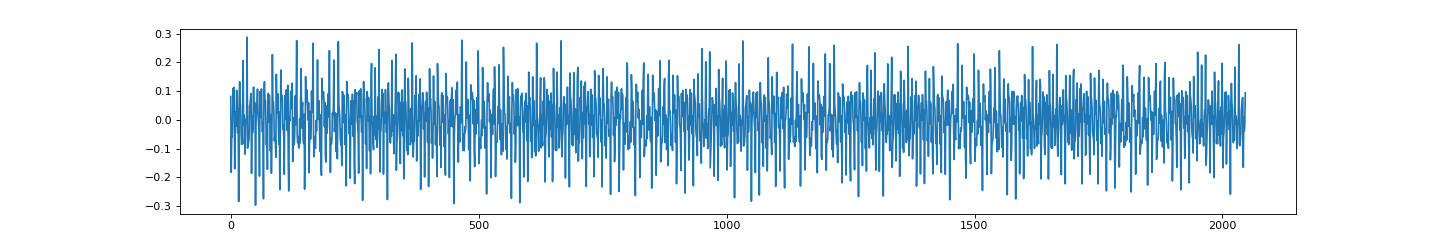

In [7]:
plt.figure(figsize=(18, 3), dpi=80)

plt.plot(np.real(vibrato1[0]))

plt.show()

In [8]:
fs_vibr1 = 1000

sd.play(np.real(vibrato1[0]), fs_vibr1)

print("The length of the signal is", N_vibr1/fs_vibr1, "seconds.")

t = np.linspace(0., N_vibr0/fs_vibr1, fs_vibr1)
amplitude = np.iinfo(np.int16).max
data  = amplitude*np.real(vibrato1[0])

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("vibrato.wav", fs_vibr1, data.astype(np.int16))

The length of the signal is 2.047 seconds.


> Noisless Signal with Eight Sinusoids (Pink Noise and SNR = 39 dB)

SNR = 38.9160056896913 dB


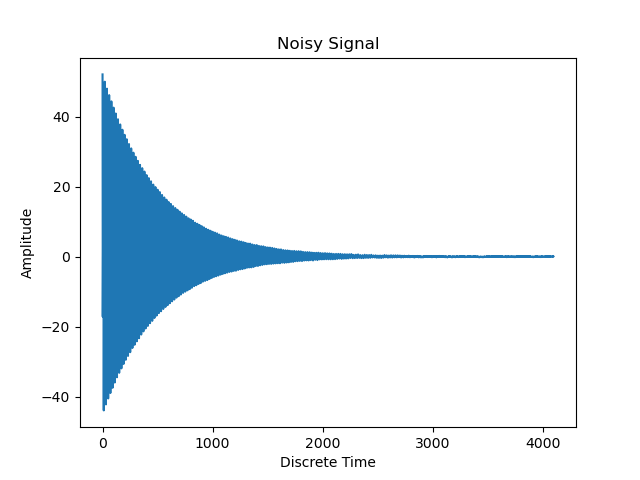

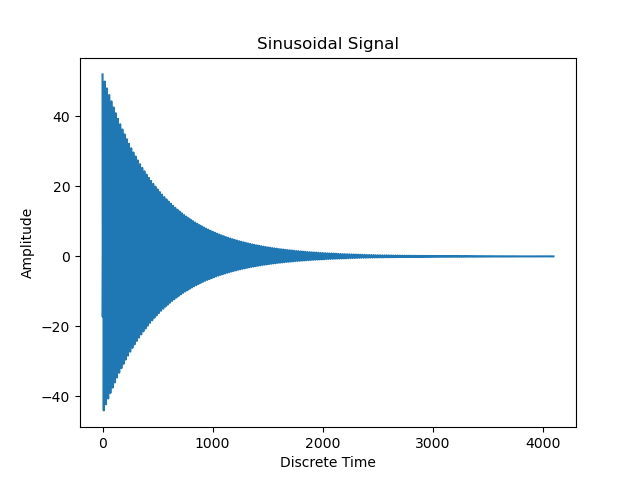

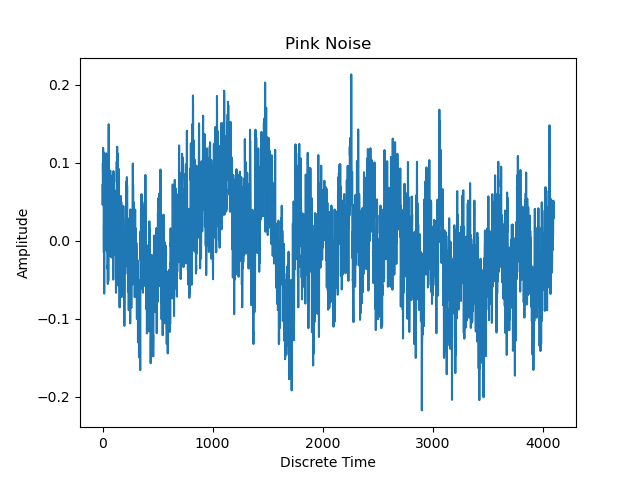

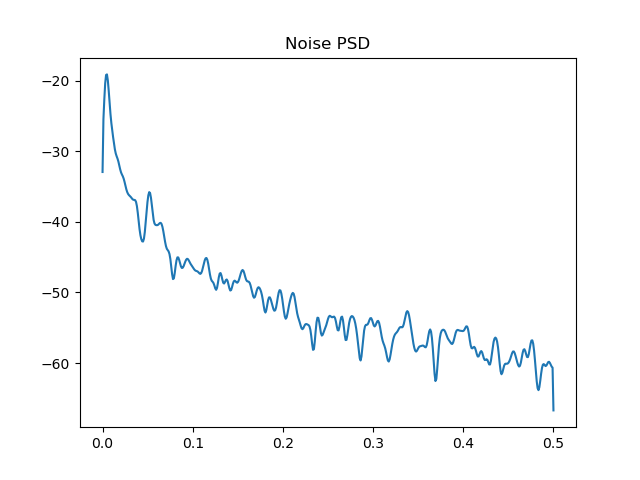

In [9]:
N_synth2 = 2**12-1

K_synth2 = 8

#f_synth2 = 0.48*np.random.rand(0,K_synth2) + 0.1*np.ones(K_synth2) 

#a_synth2 = 19*np.random.rand(0,K_synth2) + np.ones(K_synth2) 

f_synth2 = 0.05*np.arange(1,K_synth2+1)

a_synth2 = np.array([18, 15, 13, 11, 8, 5, 4, 3])

delta_synth2 = -0.002*np.ones([K_synth2])

phi_synth2 = np.array([0, 1.5, 0, 1, 0, 1.5, 0, 1])

# synthesised signal
x_synth2 = pam.synthesize(N_synth2, delta_synth2, f_synth2, a_synth2, phi_synth2, 0, 0, 2, 70)

print("SNR =", x_synth2[3], "dB")

plt.figure()
plt.plot(np.real(x_synth2[0]))
plt.title('Noisy Signal')
plt.xlabel('Discrete Time')
plt.ylabel('Amplitude')
#plt.xlim(250,3000)
plt.show()

plt.figure()
plt.plot(np.real(x_synth2[1]))
plt.title('Sinusoidal Signal')
plt.xlabel('Discrete Time')
plt.ylabel('Amplitude')
#plt.xlim(250,3000)
plt.show()

plt.figure()
plt.plot(x_synth2[2])
plt.title('Pink Noise')
plt.xlabel('Discrete Time')
plt.ylabel('Amplitude')
plt.show()


plt.figure()
plt.title("Noise PSD")
freq_synth2, PSD_noise_synth2 = signal.welch(x_synth2[2], nfft=1024)
plt.plot(freq_synth2, 20*np.log10(PSD_noise_synth2))
plt.show()


In [10]:
# play signal 
fs_synth2 = 1000

sd.play(np.real(x_synth2[0]), fs_synth2)

print("The length of the signal is", N_synth2/fs_synth2, "seconds.")

t = np.linspace(0., N_synth2/fs_synth2, fs_synth2)
amplitude = 0.01*np.iinfo(np.int16).max
data  = amplitude*np.real(x_synth2[0])

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("noisy2.wav", fs_synth2, data.astype(np.int16))

The length of the signal is 4.095 seconds.


> ## Loading Experimental Data

C:\Users\royal\anaconda3\envs\env_pam_hr\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 512 is greater than input length  = 80, using nperseg = 80
  warnings.warn('nperseg = {0:d} is greater than input length '


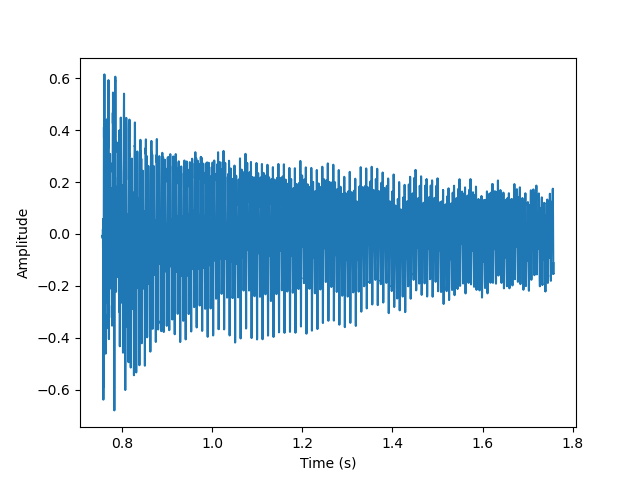

The length of the signal is 0.9999804687499998 seconds.


In [380]:
# Loading config from config files
conf_dir = pathlib.Path('./config/expr/')
data_dir = pathlib.Path('../data/expr/2022_01_27')
#
log_path = conf_dir / 'log_config.json'
conf_path = conf_dir / 'analysis_config.json'

# data_path = data_dir / 'MuteGuitar_HammerBridge_1.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired01mm_5cm_1.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired01mm_5cmFromBridge_2.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired01mm_18cmFromBridge_1.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired01mm_FifthFret_1.mat'
data_path = data_dir / 'FirstStringGuitar_CopperWired005mm_5cmFromBridge_1.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired005mm_18cmFromBridge_1.mat'
# data_path = data_dir / 'FirstStringGuitar_CopperWired005mm_FifthFret_1.mat'
# data_path = data_dir / 'MuteGuitar_HammerBridge_1.mat'



log = load_data_json(log_path)
conf = load_data_json(conf_path)
expr_data = load_analysis(data_path, conf)

fs_mic = 51200
s0 = int(fs_mic*0.757)
s1 = int(fs_mic*1.757)

# see expr/util.py for details on what's inside expr_data
mic0 = expr_data["temporal"]["mic"]["whole"][s0:s1]
times = expr_data["times"]["whole"][s0:s1]

plt.figure()
#plt.title("Temporel Recorded Acceleration")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
#plt.xlim(0.7, 1.5)
#plt.ylim(-10, 10)
plt.plot(times, mic0)
plt.show()

print("The length of the signal is", times[-1]-times[0], "seconds.")

#plt.savefig('temporel_acc.svg', facecolor="none", transparent=True, format="svg")

In [381]:
# play signal
#fs_mic = int(1/(times[1]-times[0]))

sd.play(mic0, fs_mic)


#t = np.linspace(0., N_vibr0/fs_mic, fs_mic)
#amplitude = np.iinfo(np.int16).max
#data  = 0.1*amplitude*np.real(mi0c)

# UNCOMMENT TO WRITE A NEW WAV FILE
# write("mic.wav", fs_mic, data.astype(np.int16))

In [382]:
fs_mic

51200

(50000,)

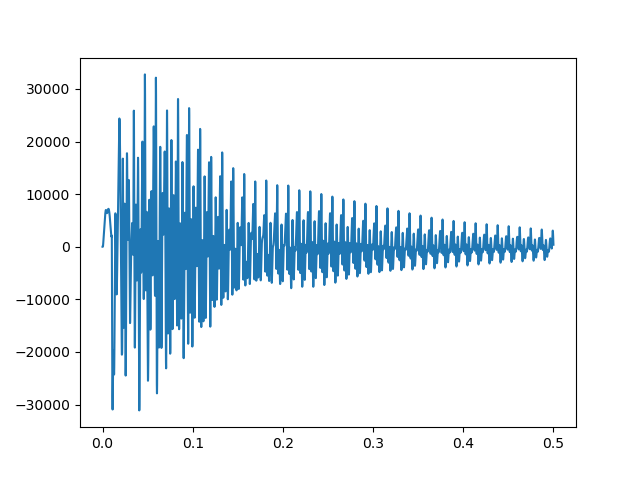

In [383]:
#uk_dir = 'C:\Users\royal\Desktop\HP\PAM\atiam_pam_hrparam\data\synth_uk\'
#file_name = pjoin(uk_dir, 'lowE_uk.wav')

file_name = r'C:\Users\royal\Desktop\HP\PAM\atiam_pam_hrparam\data\synth_uk\lowE_uk0.wav'

fs_uk, synth_uk = read(file_name)

length_uk = synth_uk.shape[0] / fs_uk

times_uk = np.linspace(0., length_uk, synth_uk.shape[0])

plt.figure()

plt.plot(times_uk, synth_uk)

synth_uk.shape


In [384]:
# play signal

sd.play(synth_uk, fs_uk)


> ## Signal Treatment

In [385]:
mic, freq_pre, PSD_mic, PSD_mic_pre = pam.preemphasize(mic0)

[]

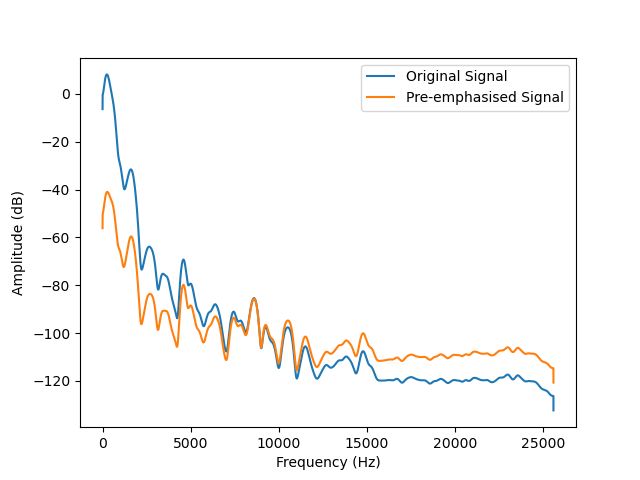

In [386]:
plt.figure()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.title('PSD before pre-emphasis')
plt.plot(freq_pre*fs_mic, 20*np.log10(PSD_mic), label="Original Signal")
plt.xlim()
#plt.savefig('PSD_beforepre_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.title('PSD after pre-emphasis')
plt.plot(freq_pre*fs_mic, 20*np.log10(PSD_mic_pre), label="Pre-emphasised Signal")
plt.legend()
#plt.savefig('PSD_preemph_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")
plt.plot()

> Constructing the Filter Bank

In [93]:
fs_mic
fs_uk

33333

10


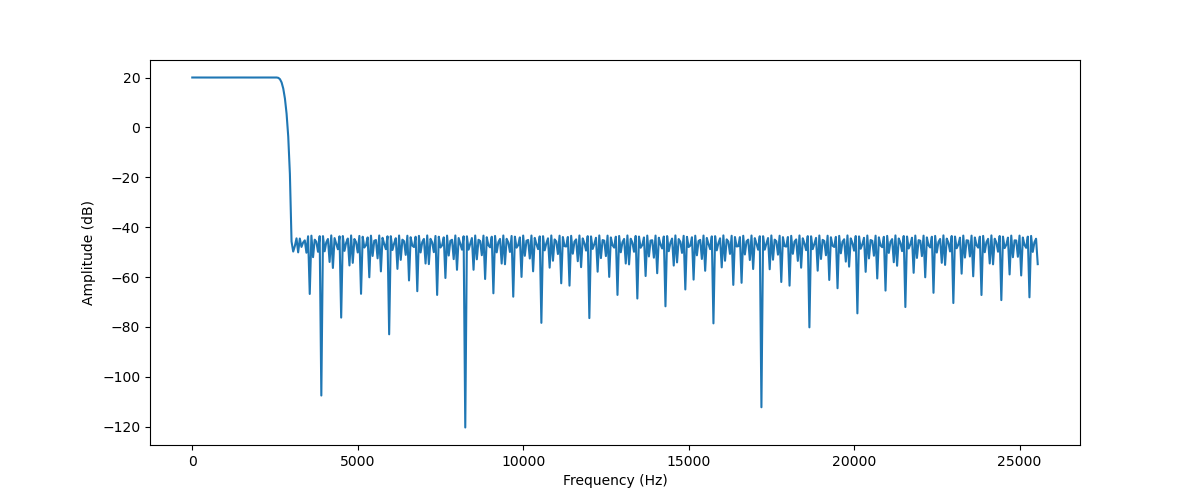

In [312]:
num_bands = 10

bank_coeffs = pam.filter_bank(num_bands, fs_mic, 425, 425)

print(len(bank_coeffs))

plt.figure(figsize=[12,5])

for i in range(len(bank_coeffs)):
    
    freqs, amps = signal.freqz(bank_coeffs[i], [1])
    plt.plot(0.5*fs_mic*freqs/np.pi, 20*np.log10(np.abs(amps)))
    
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')

#plt.savefig('filter_bank.svg', facecolor="none", transparent=True, format="svg")
plt.show()

20


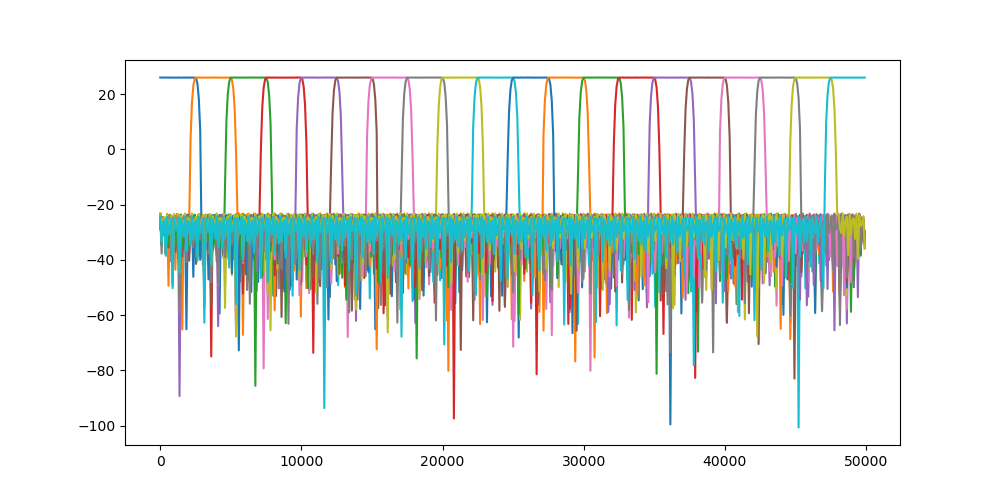

In [321]:
bank_coeffs_uk = pam.filter_bank(20, fs_uk, 625, 425)

print(len(bank_coeffs_uk))

plt.figure(figsize=[10,5])

for i in range(len(bank_coeffs_uk)):
    
    freqs, amps = signal.freqz(bank_coeffs_uk[i], [1])
    plt.plot(0.5*fs_uk*freqs/np.pi, 20*np.log10(np.abs(amps)))
    

plt.show()

> Filtering Signal with the Filter Bank and Decimation

In [96]:

mic_bands = []

for i in range(num_bands):
    # band filtering
    filtered = signal.lfilter(bank_coeffs[i], [1], mic)
    # frequency shifting
    N = filtered.shape[0]
    time = np.arange(0, N, dtype=complex)
    freq0 = 0.5*(i/num_bands)
    shifted = filtered*np.exp(2*np.pi*1j*freq0*time)
    # decimating
    decimated = pam.decimate(shifted, num_bands)
    decimated = np.real(decimated)
    mic_bands.append(decimated)
    

In [97]:
mic_bands[0].shape

(5120,)

In [323]:
# Filtering UK
num_bands_uk = len(bank_coeffs_uk)
uk_bands = []

for i in range(num_bands_uk):
    filtered = signal.lfilter(bank_coeffs_uk[i], [1], synth_uk)
    decimated = pam.decimate(filtered, num_bands_uk)
    uk_bands.append(decimated)

fs_bands_uk = fs_uk//num_bands_uk

> PSD of Signal by Sub-bands

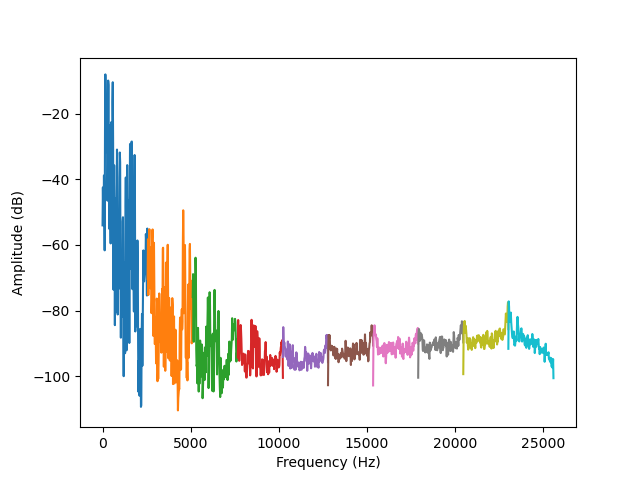

In [99]:
fs_bands = fs_mic//num_bands
plt.figure()
for i in range(num_bands):
    
    freqs, PSD = signal.welch(mic_bands[i])
    plt.plot(fs_bands*freqs+i*fs_bands/2, 20*np.log10(PSD))
    #plt.title('PSD by Sub-bands')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (dB)')

    #plt.savefig('PSD_bands.svg', facecolor="none", transparent=True, format="svg")

    #freqso, amps = signal.freqz(bank_coeffs[i], [1])
    #plt.plot(0.5*fs_mic*freqso/np.pi, 20*np.log10(np.abs(amps)))
plt.show()

#for i in range(num_bands):    
#    fft = np.fft.fft(mic_bands[i])
#    freqs = np.fft.fftfreq(mic_bands[i].size)
#    plt.figure()
#    plt.plot(freqs*fs_bands, np.abs(fft))
#    plt.show()

In [100]:
# play one sub-band
sd.play(mic_bands[0], fs_bands)

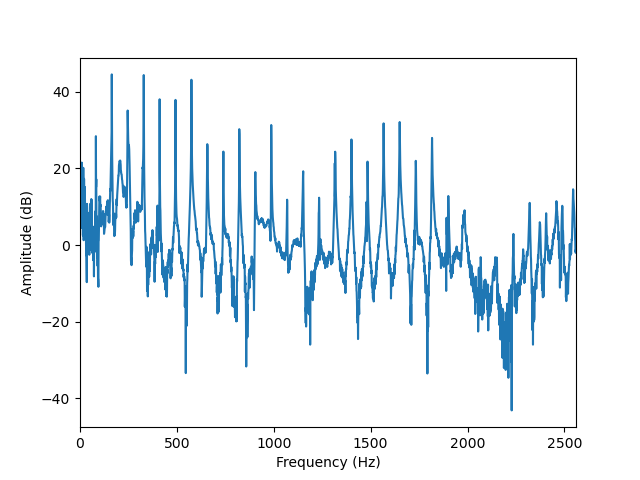

In [101]:
fft = np.fft.fft(mic_bands[0])
freqs = np.fft.fftfreq(mic_bands[0].size)
plt.figure()
plt.plot(np.fft.fftshift(freqs)*fs_bands, 20*np.log10(np.fft.fftshift(np.abs(fft))))
plt.xlim(0, 2560)
#plt.ylim(10, 10**4)
#plt.title('Periodogram')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.show()

#plt.savefig('fft_acc_lowband.svg', facecolor="none", transparent=True, format="svg")

> #### Noise Whitening

> Testing with Synthetic Signal

In [102]:
x_white2, freq2_norm, PSD_x2, PSD_noise2, PSD_x_white2, PSD_noise_white2 = pam.whiten(np.real(x_synth2[0]), 200, 4, 15)

print('The minimum value for the smoothing order is', 4*0.016*len(freq2_norm))

freq2 = fs_synth2*freq2_norm

plt.figure()
plt.title('Before Whitening')
plt.plot(freq2, 20*np.log10((PSD_x2)), label = 'PSD of signal')
plt.plot(freq2, 20*np.log10((PSD_noise2)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.show()

plt.figure()
plt.title('After Whitening')
plt.plot(freq2, 20*np.log10((PSD_x_white2)), label = 'PSD of signal')
plt.plot(freq2, 20*np.log10((PSD_noise_white2)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.show()


plt.figure()
plt.title("Noise PSD")
plt.plot(fs_synth2*freq_synth2, 20*np.log10(PSD_noise_synth2), label = 'Noise PSD')
plt.plot(freq2, 20*np.log10((PSD_noise2)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.show()

NameError: name 'x_synth2' is not defined

> Whitening the Experimental Signal (before filter bank)

In [103]:
'''
mic_white, freq_mic, PSD_mic, PSD_noise_mic, PSD_mic_white, PSD_noise_mic_white = pam.whiten(mic, 100, 4, 15)

print('The smoothing order must be at least', 4*0.016*len(freq_mic))

freq_mic *= fs_mic

plt.figure()
plt.title('Original Signal - Before Whitening')
plt.plot(freq_mic, 20*np.log10((PSD_mic)), label = 'PSD of signal')
plt.plot(freq_mic, 20*np.log10((PSD_noise_mic)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,500)
plt.legend()
plt.show()

plt.figure()
plt.title('Original Signal - After Whitening')
plt.plot(freq_mic, 20*np.log10((PSD_mic_white)), label = 'PSD of signal')
plt.plot(freq_mic, 20*np.log10((PSD_noise_mic_white)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,1000)
plt.legend()
plt.show()
'''

"\nmic_white, freq_mic, PSD_mic, PSD_noise_mic, PSD_mic_white, PSD_noise_mic_white = pam.whiten(mic, 100, 4, 15)\n\nprint('The smoothing order must be at least', 4*0.016*len(freq_mic))\n\nfreq_mic *= fs_mic\n\nplt.figure()\nplt.title('Original Signal - Before Whitening')\nplt.plot(freq_mic, 20*np.log10((PSD_mic)), label = 'PSD of signal')\nplt.plot(freq_mic, 20*np.log10((PSD_noise_mic)), label = 'Noise PSD Estimation')\nplt.xlabel('Frequency (Hz)')\nplt.ylabel('Amplitude (dB)')\n#plt.xlim(0,500)\nplt.legend()\nplt.show()\n\nplt.figure()\nplt.title('Original Signal - After Whitening')\nplt.plot(freq_mic, 20*np.log10((PSD_mic_white)), label = 'PSD of signal')\nplt.plot(freq_mic, 20*np.log10((PSD_noise_mic_white)), label = 'Noise PSD Estimation')\nplt.xlabel('Frequency (Hz)')\nplt.ylabel('Amplitude (dB)')\n#plt.xlim(0,1000)\nplt.legend()\nplt.show()\n"

> Whitening the First Band

[0.00033539 0.00027326 0.00019975 ... 0.00014064 0.00019975 0.00027326]
The smoothing order must be at least 262.208


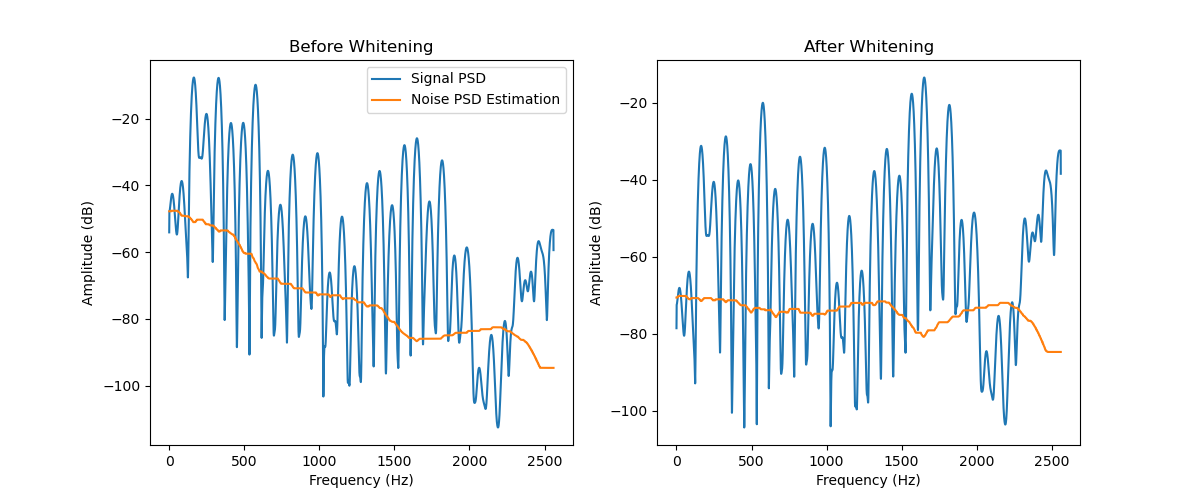

In [118]:
band0_white, freq_band0, PSD_band0, PSD_noise_band0, PSD_band0_white, PSD_noise_band0_white, AR_band0_white = pam.whiten(mic_bands[0], 2000, 4, 15)

print('The smoothing order must be at least', 4*0.016*len(freq_band0))

freq_band0 *= fs_bands

plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)

plt.title('Before Whitening')
plt.plot(freq_band0, 20*np.log10((PSD_band0)), label = 'Signal PSD')
plt.plot(freq_band0, 20*np.log10((PSD_noise_band0)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,1000)
plt.legend()
#plt.savefig('1stband_c_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")


plt.subplot(1, 2, 2)
plt.title('After Whitening')
plt.plot(freq_band0, 20*np.log10((PSD_band0_white)), label = 'Signal PSD')
plt.plot(freq_band0, 20*np.log10((PSD_noise_band0_white)), label = 'Noise PSD Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
#plt.xlim(0,1000)
#plt.legend()
#plt.savefig('whiten_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")
plt.show()

> ## HR Analysis

> Testing EPRIT and LeastSquares

In [105]:
delta_an, f_an = pam.esprit(x_synth[0], 32, 2)

alpha_an, a_an, phi_an = pam.least_squares(x_synth[0], delta_an, f_an)

#EdB_an = Energy(x_synth, delta_an, a_an)

print(delta_an, f_an, alpha_an, a_an, phi_an)#, EdB_an)


NameError: name 'x_synth' is not defined

> Testing ESPRIT by Blocks (with a vibrato)

In [106]:
delta00, f00, alpha00, a00, phi00 = pam.esprit_blocks(vibrato0[0][:200], 0.035, 0.020, fs_vibr0, 32, 1)

print('- Damping factors:\n', delta00, '\n- Frequencies:\n', f00*fs_vibr0, '\n- Complex Amplitudes:\n', alpha00, '\n- Amplitudes:\n', a00, '\n- Intial Phases:\n', phi00 )

NameError: name 'vibrato0' is not defined

In [107]:
delta00, f00, alpha00, a00, phi00 = pam.esprit_blocks(vibrato1[0][:200], 0.035, 0.020, fs_vibr1, 32, 8)

print('- Damping factors:\n', delta00, '\n- Frequencies:\n', f00*fs_vibr1, '\n- Complex Amplitudes:\n', alpha00, '\n- Amplitudes:\n', a00, '\n- Intial Phases:\n', phi00 )

NameError: name 'vibrato1' is not defined

> HR Analysis for Experimental Signal

In [108]:
delta_mic, f_mic, alpha_mic, a_mic, phi_mic = pam.esprit_blocks(mic_white, 0.030, 0.020, fs_mic, 32, 30)

print( 'Frequencies:\n', f_mic*fs_mic, '\n\n- Damping factors:\n', delta_mic, '\n\n- Complex Amplitudes:\n', alpha_mic, '\n\n- Amplitudes:\n', a_mic, '\n\n- Intial Phases:\n', phi_mic )

NameError: name 'mic_white' is not defined

In [368]:
# ESPRIT FOR synth_uk
window_length = 0.1
hop_size = 0.01

delta_uk, freq_uk, alpha_uk, amp_uk, phi_uk = pam.esprit_blocks(uk_bands[0], window_length, hop_size, fs_bands_uk, 68, 66)

freq_uk_hz = freq_uk*fs_bands_uk

print(freq_uk_hz.shape)

print( 'Frequencies:\n', freq_uk_hz) #, '\n\n- Damping factors:\n', delta_band0, '\n\n- Complex Amplitudes:\n', alpha_band0, '\n\n- Amplitudes:\n', amp_band0, '\n\n- Intial Phases:\n', phi_band0 )

(40, 66)
Frequencies:
 [[   73.99091267   -73.99091267   104.8892947  ...  2459.8469716
  -2459.8469716   2499.5       ]
 [ 2461.65307796 -2461.65307796  2376.84210294 ...   -74.25867846
    176.45197961  -176.45197961]
 [ 2499.5         2397.10567941 -2397.10567941 ...   107.10050501
   -107.10050501     0.        ]
 ...
 [   81.56457222   -81.56457222   163.39612552 ...  2499.5
   2420.37144574 -2420.37144574]
 [   81.56709203   -81.56709203   163.40556316 ... -2294.94256803
   2204.74464595 -2204.74464595]
 [   81.56777828   -81.56777828   163.39880834 ... -2304.04184114
   2104.02656817 -2104.02656817]]


In [349]:


#band0_white_n = int(2*window_length*fs_mic/5)



In [350]:
band0_white_n = 68

band0_white_order_pmax = band0_white_n//2

band0_white_order = pierre.Ester.estimate_esm_ordre(band0_white, band0_white_n, band0_white_order_pmax)

band0_white_order

34

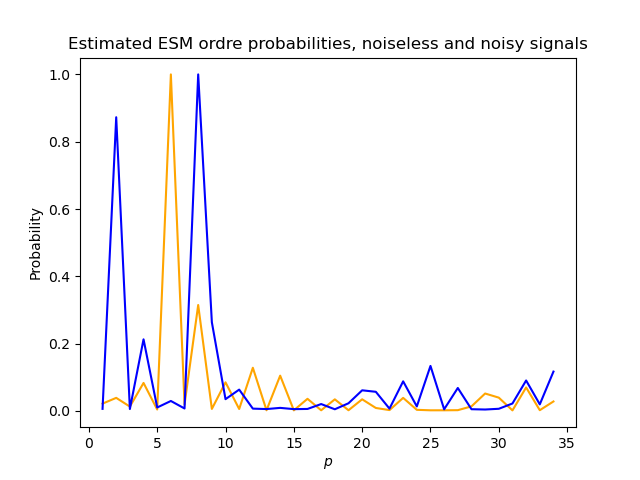

Ordre of the ESM model
 Noisy=14, Whitened=34


In [351]:
ps = np.arange(1,band0_white_order_pmax+1)
#j_sine = Ester.inverse_error_func(x_sine, n=n_est, p_max=p_max)
j_noise = pierre.Ester.inverse_error_func(mic_bands[0], n=band0_white_n, p_max=band0_white_order_pmax)
j_white = pierre.Ester.inverse_error_func(band0_white, n=band0_white_n, p_max=band0_white_order_pmax)

plt.figure()
plt.title('Estimated ESM ordre probabilities, noiseless and noisy signals')
plt.xlabel('$p$')
plt.ylabel('Probability')
#plt.plot(ps, j_sine/np.max(j_sine), c='cyan')
plt.plot(ps, j_noise/np.max(j_noise), c='orange')
plt.plot(ps, j_white/np.max(j_white), c='b')
plt.show()

#r_est_sine = Ester.estimate_esm_ordre(x_sine, n_est, p_max)
r_est_noise = pierre.Ester.estimate_esm_ordre(mic_bands[0], n=band0_white_n, p_max=band0_white_order_pmax)
r_est_white = pierre.Ester.estimate_esm_ordre(band0_white, n=band0_white_n, p_max=band0_white_order_pmax)
print('Ordre of the ESM model')
print(f' Noisy={r_est_noise}, Whitened={r_est_white}')

In [369]:
window_length = 0.1
hop_size = 0.01

delta_band0, freq_band0, alpha_band0, amp_band0, phi_band0 = pam.esprit_blocks(band0_white, window_length, hop_size, fs_bands, 68, 2*33)

freq_band0_hz = freq_band0*fs_bands
print(freq_band0_hz.shape)

print( 'Frequencies:\n', freq_band0_hz) #, '\n\n- Damping factors:\n', delta_band0, '\n\n- Complex Amplitudes:\n', alpha_band0, '\n\n- Amplitudes:\n', amp_band0, '\n\n- Intial Phases:\n', phi_band0 )

(90, 66)
Frequencies:
 [[    0.           327.07701436  -327.07701436 ... -2462.61933774
   2253.5871799  -2253.5871799 ]
 [ 2543.73195689 -2543.73195689  2464.37322473 ...  -824.19528157
    815.80088943  -815.80088943]
 [   17.19663274   -17.19663274   167.07410936 ...  2505.76133099
  -2505.76133099  2560.        ]
 ...
 [  164.23911905  -164.23911905    22.89613519 ... -2396.80510822
   2333.57199973 -2333.57199973]
 [  164.15866802  -164.15866802    25.75811128 ... -2524.62256243
   2476.79659261 -2476.79659261]
 [  164.11648918  -164.11648918    23.96611505 ... -2239.54555218
   2145.63601604 -2145.63601604]]


frequencies
 [  14.48567916   83.28265357  164.21652452  245.42075776  328.7842191
  411.0798267   493.1094247   575.15117247  657.41757154  739.74751601
  822.53966062  904.47081811  987.05405355 1069.24335606 1152.47955122
 1234.19770924 1318.22708863 1401.02149256 1483.64401628 1567.04626669
 1650.06496557 1733.17703007 1817.00105841 1834.11054094 1898.87269495
 1980.95212084 2062.78264018 2152.08651808 2237.61661197 2323.82174961
 2404.59274429 2472.95995356 2542.47714402]
amplitudes
 [0.00115737 0.00189408 0.01021077 0.00611488 0.01319192 0.00619936
 0.0082403  0.02227499 0.00690837 0.00419164 0.00969727 0.00316083
 0.014381   0.0020957  0.00365844 0.00217616 0.00399768 0.01193463
 0.00983363 0.02745034 0.03019374 0.01031909 0.020662   0.00064751
 0.00254803 0.00138463 0.00078433 0.00028162 0.00070373 0.00131484
 0.00156869 0.00077318 0.00283141]
damping factors
 [-2.13073198e-03 -5.03042514e-04 -1.09681936e-04 -1.14035991e-03
 -2.24314069e-04 -1.03883282e-04 -1.76792148e-04 -2.75

C:\Users\royal\AppData\Local\Temp\ipykernel_57796\941813333.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x_uk[:], 0.8*y_uk[:], 'g', markerfmt='Dg',  label='HR (UK synthesis)')


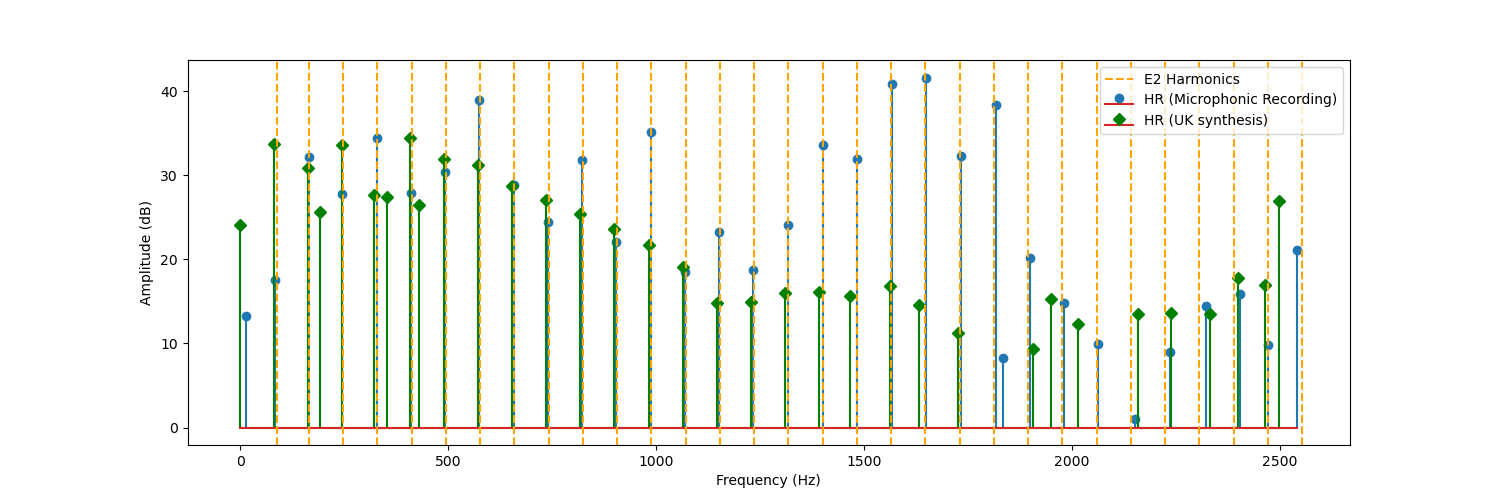

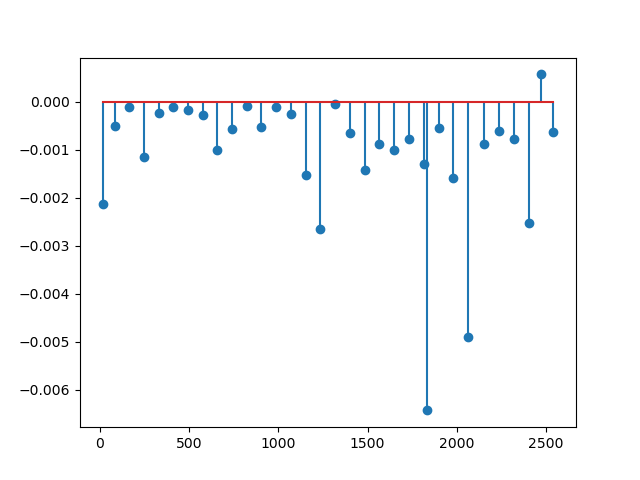

In [374]:
block = 20

graph = np.array([freq_band0_hz[block], amp_band0[block], delta_band0[block], phi_band0[block]]) #alpha_band0[block]

graph = graph[:, graph[0, :].argsort()]

start = freq_band0_hz.shape[1]//2 


freqs_alex = graph[0][start:] #freq
nus_alex = freqs_alex/fs_bands
amps_log = np.abs(np.min(20*np.log10(graph[1][start:]))) + 20*np.log10(graph[1][start:]) + 1 #amp log

amps_alex = graph[1][start:]
damping_alex = graph[2][start:] #damping
phases_alex = graph[3][start:]
#complex_alex = graph[4][start:]

graph_uk = np.array([freq_uk_hz[block], amp_uk[block]])

graph_uk = graph_uk[:, graph_uk[0, :].argsort()]

start_uk = freq_uk_hz.shape[1]//2 - 1

x_uk = graph_uk[0][start_uk:]
y_uk = np.abs(np.min(20*np.log10(graph_uk[1][start_uk:]))) + 20*np.log10(graph_uk[1][start_uk:]) + 1
y_uk = 0.4*y_uk

print('frequencies\n', freqs_alex)
print('amplitudes\n', amps_alex)
print('damping factors\n', damping_alex)
print('initial phases\n', phases_alex)
#print('complex amplitudes\n', complex_alex)

#print(x_uk)

plt.figure(figsize = [15,5])

#plt.title('Frequencies detected by ESPRIT for a block of ' + str(window_length*1000) + ' ms\n(' + str(block*hop_size*1000) + ' ms after attack).')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')


plt.stem(freqs_alex, amps_log, label='HR (Microphonic Recording)')


#plt.setp(markerline, markersize = 5)

plt.stem(x_uk[:], 0.8*y_uk[:], 'g', markerfmt='Dg',  label='HR (UK synthesis)')


plt.axvline(88.4, 0, 1, color='orange', linestyle='dashed', label='E2 Harmonics')
for i in range(2,32):
    plt.axvline(i*82.4, 0, 1, color='orange', linestyle='dashed')

plt.legend(loc = 'upper right')

#plt.savefig('comparison.svg', facecolor="none", transparent=True, format="svg")
plt.show()

plt.figure()
plt.stem(freqs_alex, damping_alex, label='HR Analysis')
plt.show()

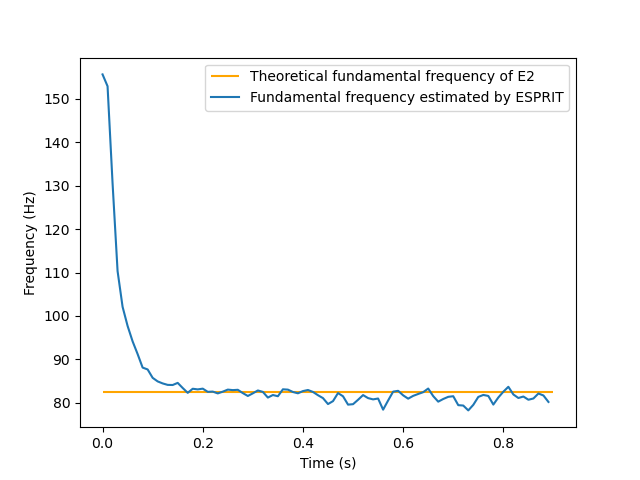

In [354]:
num_block = len(delta_band0)
fundamental = 82.4

freqs_fund = []

for block in range(num_block):

    graph = np.array([freq_band0_hz[block], amp_band0[block], delta_band0[block], phi_band0[block]]) #alpha_band0[block]
    graph = graph[:, graph[0, :].argsort()]
    freqs_all = graph[0]
    
    if block < num_block//6:
        threshold = 0
    else:
        threshold = -5

    freq0 = min(freq for freq in freqs_all - fundamental if freq > threshold)
    i0 = np.where(freqs_all == freq0 + fundamental)
    freqs_fund.append(freqs_all[i0])


plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
blocks = np.arange(num_block)
plt.hlines(82.4, 0, 0.9, 'orange', label='Theoretical fundamental frequency of E2')
plt.plot(hop_size*blocks, freqs_fund, label='Fundamental frequency estimated by ESPRIT')
plt.legend()
plt.show()
#plt.savefig('fundamental.svg', facecolor="none", transparent=True, format="svg")
   

In [346]:
nus_alex

array([0.00282923, 0.01626614, 0.03207354, 0.04793374, 0.06421567,
       0.08028903, 0.09631043, 0.11233421, 0.12840187, 0.14448194,
       0.16065228, 0.17665446, 0.19278399, 0.20883659, 0.22509366,
       0.24105424, 0.25746623, 0.27363701, 0.28977422, 0.30606372,
       0.32227831, 0.33851114, 0.35488302, 0.35822472, 0.37087357,
       0.38690471, 0.40288723, 0.4203294 , 0.43703449, 0.45387144,
       0.46964702, 0.48299999, 0.49657757])

In [352]:
AR_band0_white = np.flip(AR_band0_white)

zeds = np.exp(2*np.pi*1j*nus_alex)

dewhite_coeffs = np.polyval(AR_band0_white, zeds**(-1))
amps_alex_dewhite = amps_alex/np.abs(dewhite_coeffs)

np.abs(dewhite_coeffs)


array([0.36781313, 0.36304819, 0.37067648, 0.40992391, 0.44929576,
       0.46285994, 0.48968722, 0.58395579, 0.72301841, 0.85455851,
       0.954489  , 1.03294344, 1.09881154, 1.13814313, 1.14530166,
       1.14467366, 1.17254824, 1.23892976, 1.32026796, 1.39872028,
       1.46485429, 1.49776151, 1.48136816, 1.43689221, 1.41141042,
       1.4303694 , 1.45469977, 1.6471833 , 1.71203245, 1.76151612,
       1.80605042, 1.82225448])

In [353]:
print(amps_alex)
print(amps_alex_dewhite)

[0.0005585  0.00792376 0.02813561 0.00616838 0.0069457  0.0088795
 0.00797311 0.00574433 0.00434528 0.00520352 0.01355192 0.00333148
 0.02138357 0.00828282 0.01022443 0.00232042 0.00693674 0.01224077
 0.00274874 0.00570555 0.020653   0.00659392 0.00485564 0.00192136
 0.00057937 0.00029653 0.00081203 0.00687564 0.00508475 0.00035018
 0.00111698 0.00328328]
[0.00151842 0.02182563 0.07590342 0.01504762 0.01545907 0.019184
 0.01628205 0.00983693 0.00600992 0.00608913 0.01419808 0.00322523
 0.01946064 0.00727748 0.00892728 0.00202715 0.00591596 0.00988011
 0.00208196 0.00407912 0.01409901 0.00440252 0.00327781 0.00133716
 0.00041049 0.00020731 0.00055821 0.00417418 0.00297001 0.0001988
 0.00061847 0.00180177]


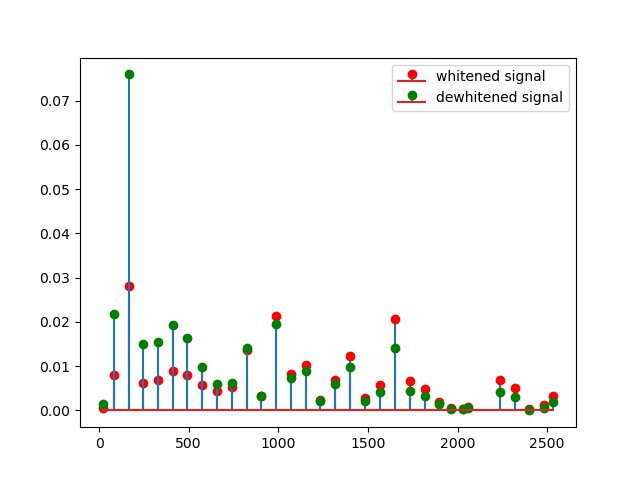

In [354]:
plt.figure()
plt.stem(freqs_alex, amps_alex, markerfmt='ro', label='whitened signal')
plt.stem(freqs_alex, amps_alex_dewhite, markerfmt='go', label='dewhitened signal')
plt.legend()
plt.show()

In [355]:
damp_acc = np.array([-0.01270824, -0.00470592, -0.00454763, -0.00187058, -0.00478688, -0.00282691, -0.00382689, -0.0108937, -0.00989453])
modal_mass = np.array([2.91, 0.45, 0.25, 2.65, 9.88, 0.41, 0.38, 1.07, 2.33])

In [356]:
c_n = -2*modal_mass*damp_acc*fs_bands
c_n

array([378.68521882,  21.68487936,  11.6419328 ,  50.76005888,
       484.29439386,  11.86849894,  14.89119437, 119.36009216,
       236.07557018])

In [400]:
freqs_study = freqs_alex[1:24]
n_x = np.arange(len(freqs_study)) + 1
freqs_y = freqs_study / (n_x)
freqs_study

array([  82.20471146,  164.16471291,  245.5928585 ,  328.85808723,
        411.09923809,  493.18351673,  575.49430216,  657.10760958,
        739.97136373,  822.64610494,  904.29427601,  987.34784937,
       1070.20168436, 1152.38543418, 1234.22095444, 1317.16965487,
       1401.41691349, 1484.04093061, 1566.26191227, 1650.21355688,
       1733.50276431, 1816.9536669 , 1894.13299837])

In [405]:
def fit_func(n, a2):
    # Curve fitting function
    return a2 * n**2 + freqs_study[0]  # a1=0, a0=1

In [406]:
params = curve_fit(fit_func, n_x, freqs_y)
[a2] = params[0]
n_fit = np.linspace(n_x[0], n_x[-1], 100)
y_fit = a2 * n_fit**2 + freqs_study[0]


a_2 = 0.00060564218


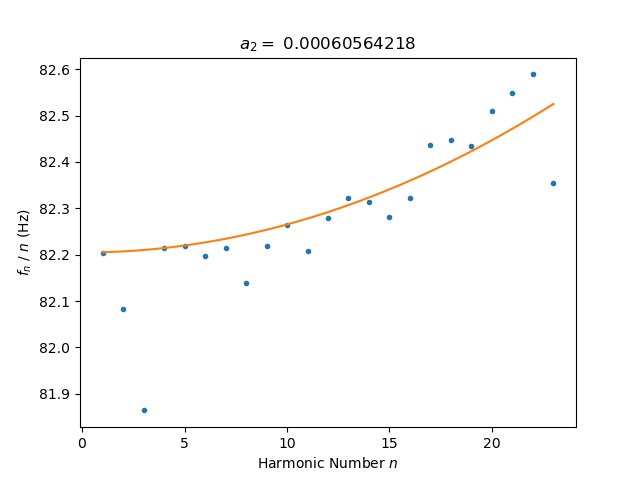

In [421]:
print('a_2 = ' + str(round(a2, 11)))
plt.figure()

plt.plot(n_x, freqs_y, '.')         # Data
plt.plot(n_fit, y_fit)  # Fitted curve
plt.title('$a_2 =$ ' + str(round(a2, 11)))
plt.xlabel("Harmonic Number $n$")
plt.ylabel("$f_n$ / $n$ (Hz)")

#plt.savefig('quad2000_025_05_68_32_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")
plt.show()

In [409]:
freqs_lin = freqs_alex[1:12]
n_lin = np.arange(len(freqs_lin)) + 1
freqs_lin_y = freqs_lin / n_lin

In [410]:
L = 0.61

def fit_lin(n, c):
    # Curve fitting function
    return c/(2*L)

In [411]:
params1 = curve_fit(fit_lin, n_lin, freqs_lin_y)
[c] = params1[0]
n_fit1 = np.linspace(n_lin[0], n_lin[-1], 100)
y_fit1 = 0 * n_fit1 + c/(2*L)


c = 100.24264 m/s
rho = 0.00659kg/m
T = 66.25unit


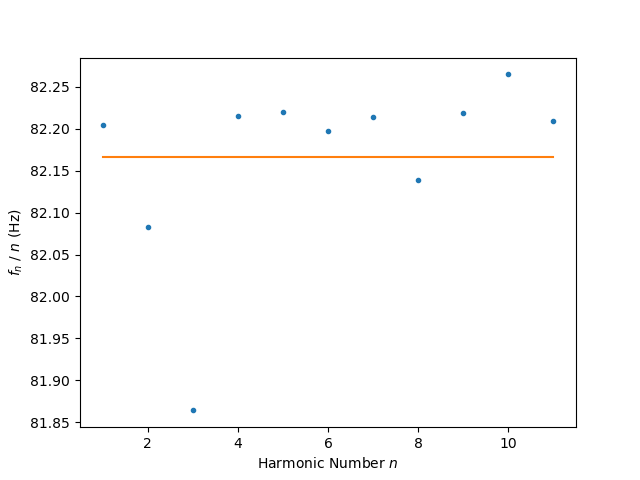

In [418]:
print('c = ' + str(round(c, 5)) + ' m/s')
rho = 6*10**(-3) / 0.91
print('rho = ' + str(round(rho, 5)) + 'kg/m')
tension = rho*c**2
print('T = ' + str(round(tension, 2)) + 'unit')

plt.figure()

plt.plot(n_lin, freqs_lin_y, '.')
plt.plot(n_fit1, y_fit1)  # Fitted curve
#plt.title('$c =$ ' + str(round(c, 1)) + ' m/s')

plt.xlabel("Harmonic Number $n$")
plt.ylabel("$f_n$ / $n$ (Hz)")

#plt.savefig('lin2000_025_05_68_32_005mm_18cmFromBridge_1.svg', facecolor="none", transparent=True, format="svg")
plt.show()

In [441]:
B = 2*tension*(L**2)*a2 / (np.pi**2*freqs_study[0])
B

3.6806473843720195e-05

In [212]:
fs_bands

5120

In [447]:
fs_bands*0.05

256.0

In [114]:
# pre-emphasize
mic_pre, freq_pre, PSD_mic, PSD_mic_pre = pam.preemphasize(mic0)
   
colored_list = []
white_list = []
freq_list = []
PSD_c_list = []
PSD_noise_c_list = []
PSD_w_list = []
PSD_noise_w_list = []
ESTER_orders = []
delta_list = []
freq_list = []
alpha_list = []
amp_list = []
phi_list = []
synth_list = []
synth_up_list = []

window_length = 0.05
hop_size = 0.05

mic0_length = len(mic0)  # the length of the signal (in samples)
block_length = int(window_length * fs_bands)  # window size (in samples)
h = int(hop_size * fs_bands)  # hop size (in samples)
num_blocks = int((mic0_length - block_length) / h)
total_length = block_length*num_bands*num_blocks
synth_final = np.zeros(48640)

for i in range(num_bands):

    # apply filter bank
    filtered = signal.lfilter(bank_coeffs[i], [1], mic_pre)
    # frequency shifting
    N = filtered.shape[0]
    time = np.arange(0, N, dtype=complex)
    freq0 = 0.5*(i/num_bands)
    shifted = filtered*np.exp(2*np.pi*1j*freq0*time)
    # decimating
    decimated = pam.decimate(shifted, num_bands)
    decimated = np.real(decimated)
    band_white, freq_band, PSD_band, PSD_noise_band, PSD_band_white, PSD_noise_band_white, AR_band_coeffs = pam.whiten(decimated, 2000, 4, 15)
    white_list.append(band_white)
    freq_list.append(freq_band)
    PSD_c_list.append(PSD_band)
    PSD_noise_c_list.append(PSD_noise_band)
    PSD_w_list.append(PSD_band_white)
    PSD_noise_w_list.append(PSD_noise_band_white)
    # ESTER
    n = 68
    p_max = n//2
    r = pierre.Ester.estimate_esm_ordre(band_white, n, p_max)
    ESTER_orders.append(r)
    # ESPRIT
    delta_band, freq_band, alpha_band, amp_band, phi_band = pam.esprit_blocks(band_white, window_length, hop_size, fs_bands, n, 2*r)
    # correcting amplitudes
    AR_band_coeffs = np.flip(AR_band_coeffs)
    zeds = np.exp(2*np.pi*1j*freq_band)
    dewhite_coeffs = np.polyval(AR_band_coeffs, zeds**(-1))
    amp_band = amp_band/np.abs(dewhite_coeffs)
    # re-shifting frequencies 
    freq_band += freq0
    # filling lists
    delta_list.append(delta_band)
    freq_list.append(freq_band)
    alpha_list.append(alpha_band)
    amp_list.append(amp_band)
    phi_list.append(phi_band)
    # synthesize
    synth_band = np.array([])
    for j in range(len(delta_band)):
        block, _, _, _ = pam.synthesize(block_length, delta_band[j], freq_band[j], amp_band[j], phi_band[j])
        synth_band = np.concatenate((synth_band, np.real(block)))
    synth_list.append(synth_band)
    # resample
    synth_band_up = signal.resample(synth_band, num_bands*len(synth_band))
    synth_up_list.append(synth_band_up)
    # add bands
    synth_band_up = np.array(synth_band_up)
    synth_final += synth_band_up

[0.00033539 0.00027326 0.00019975 ... 0.00014064 0.00019975 0.00027326]
[1.21043559e-05 3.83895878e-06 3.02890171e-06 ... 4.90191000e-07
 3.02890171e-06 3.83895878e-06]
[ 6.18666763e-06  8.89778676e-08  6.69722381e-07 ... -4.29303885e-07
  6.69722381e-07  8.89778676e-08]
[7.24354979e-06 1.56291038e-07 2.58157854e-07 ... 3.74913639e-08
 2.58157854e-07 1.56291038e-07]
[ 8.01904170e-06 -2.50812872e-07  3.75770921e-07 ...  9.93117502e-08
  3.75770921e-07 -2.50812872e-07]
[ 1.07765236e-05 -3.74243345e-07  2.79722364e-07 ... -1.84770536e-09
  2.79722364e-07 -3.74243345e-07]
[ 1.19786584e-05 -1.02749448e-07  1.50266338e-07 ... -6.27945253e-08
  1.50266338e-07 -1.02749448e-07]
[ 1.36546774e-05 -4.58656487e-07  2.27125418e-07 ... -1.44863644e-07
  2.27125418e-07 -4.58656487e-07]
[ 1.66994746e-05 -8.63488318e-07  6.53642010e-07 ... -2.95091244e-07
  6.53642010e-07 -8.63488318e-07]
[ 1.38923039e-05  2.49842234e-06 -1.04990521e-07 ...  1.84122114e-07
 -1.04990521e-07  2.49842234e-06]


In [115]:
print(ESTER_orders)

[34, 2, 7, 34, 34, 29, 1, 4, 1, 1]


In [167]:
synth_band_up.shape

(28160,)

In [168]:
256*11

2816

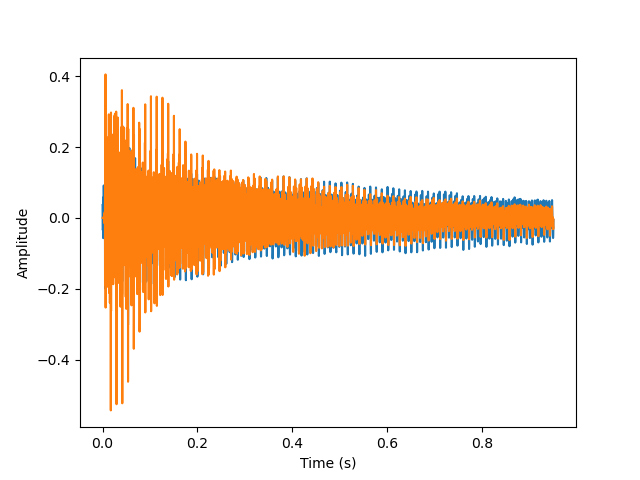

In [61]:
i = 0

length_sec = len(synth_list[i]) / fs_bands
times_synth = np.linspace(0., length_sec, len(synth_list[i]))

plt.figure()
plt.plot(times_synth, 0.5*synth_list[i])
plt.plot(times_synth, white_list[i][:4864])
 #white_list[i][:4864]- 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

sd.play(synth_list[i], fs_bands)

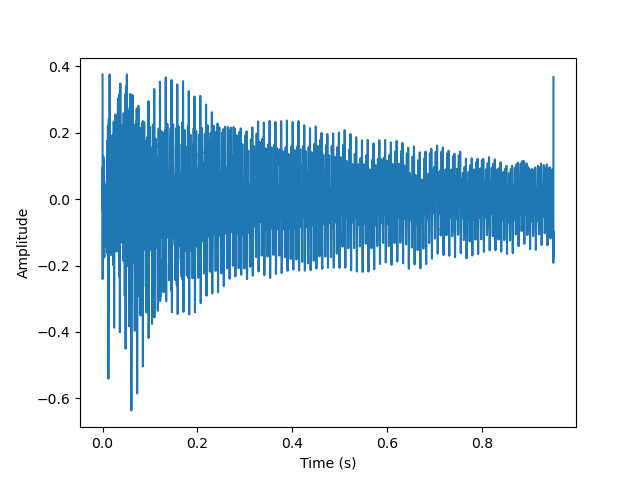

In [493]:
times_final = np.linspace(0., length_sec, len(synth_final))

plt.figure()
plt.plot(times_final, synth_final)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

sd.play(synth_final, fs_mic)

In [234]:
sd.play(mic, fs_mic)